<a href="https://www.kaggle.com/code/thiagosalesfreireluz/exoplanet-identification-classification?scriptVersionId=224343198" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Task for Today  

***

## Exoplanet Identification  
  
Given *data collected about objects in space*, let's try to predict whether a given object is an **exoplanet** or not.  
  
We will use a variety of classification models to make our predictions.

# Getting Started

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
pd.set_option('max_columns', None)

#libraries for feature selection
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


#libraries for classifiers
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier,VotingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.ensemble import StackingClassifier

import warnings
warnings.filterwarnings(action='ignore')

In [2]:
#reading the dataset

In [3]:
data = pd.read_csv('../input/kepler-exoplanet-search-results/cumulative.csv')

In [4]:
data

,rowid,kepid,kepoi_name,kepler_name,koi_disposition,koi_pdisposition,koi_score,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,koi_time0bk_err2,koi_impact,koi_impact_err1,koi_impact_err2,koi_duration,koi_duration_err1,koi_duration_err2,koi_depth,koi_depth_err1,koi_depth_err2,koi_prad,koi_prad_err1,koi_prad_err2,koi_teq,koi_teq_err1,koi_teq_err2,koi_insol,koi_insol_err1,koi_insol_err2,koi_model_snr,koi_tce_plnt_num,koi_tce_delivname,koi_steff,koi_steff_err1,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,1,10797460,K00752.01,Kepler-227 b,CONFIRMED,CANDIDATE,1.000,0,0,0,0,9.488036,2.775000e-05,-2.775000e-05,170.538750,0.002160,-0.002160,0.146,0.318,-0.146,2.95750,0.08190,-0.08190,615.8,19.5,-19.5,2.26,0.26,-0.15,793.0,NaN,NaN,93.59,29.45,-16.65,35.8,1.0,q1_q17_dr25_tce,5455.0,81.0,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,2,10797460,K00752.02,Kepler-227 c,CONFIRMED,CANDIDATE,0.969,0,0,0,0,54.418383,2.479000e-04,-2.479000e-04,162.513840,0.003520,-0.003520,0.586,0.059,-0.443,4.50700,0.11600,-0.11600,874.8,35.5,-35.5,2.83,0.32,-0.19,443.0,NaN,NaN,9.11,2.87,-1.62,25.8,2.0,q1_q17_dr25_tce,5455.0,81.0,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
2,3,10811496,K00753.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.000,0,1,0,0,19.899140,1.494000e-05,-1.494000e-05,175.850252,0.000581,-0.000581,0.969,5.126,-0.077,1.78220,0.03410,-0.03410,10829.0,171.0,-171.0,14.60,3.92,-1.31,638.0,NaN,NaN,39.30,31.04,-10.49,76.3,1.0,q1_q17_dr25_tce,5853.0,158.0,-176.0,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
3,4,10848459,K00754.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.000,0,1,0,0,1.736952,2.630000e-07,-2.630000e-07,170.307565,0.000115,-0.000115,1.276,0.115,-0.092,2.40641,0.00537,-0.00537,8079.2,12.8,-12.8,33.46,8.50,-2.83,1395.0,NaN,NaN,891.96,668.95,-230.35,505.6,1.0,q1_q17_dr25_tce,5805.0,157.0,-174.0,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
4,5,10854555,K00755.01,Kepler-664 b,CONFIRMED,CANDIDATE,1.000,0,0,0,0,2.525592,3.761000e-06,-3.761000e-06,171.595550,0.001130,-0.001130,0.701,0.235,-0.478,1.65450,0.04200,-0.04200,603.3,16.9,-16.9,2.75,0.88,-0.35,1406.0,NaN,NaN,926.16,874.33,-314.24,40.9,1.0,q1_q17_dr25_tce,6031.0,169.0,-211.0,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9559,9560,10031643,K07984.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.000,0,0,0,1,8.589871,1.846000e-04,-1.846000e-04,132.016100,0.015700,-0.015700,0.765,0.023,-0.541,4.80600,0.63400,-0.63400,87.7,13.0,-13.0,1.11,0.32,-0.23,929.0,NaN,NaN,176.40,152.77,-77.60,8.4,1.0,q1_q17_dr25_tce,5638.0,169.0,-152.0,4.296,0.231,-0.189,1.088,0.313,-0.228,298.74921,46.973351,14.478
9560,9561,10090151,K07985.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.000,0,1,1,0,0.527699,1.160000e-07,-1.160000e-07,131.705093,0.000170,-0.000170,1.252,0.051,-0.049,3.22210,0.01740,-0.01740,1579.2,4.6,-4.6,29.35,7.70,-2.57,2088.0,NaN,NaN,4500.53,3406.38,-1175.26,453.3,1.0,q1_q17_dr25_tce,5638.0,139.0,-166.0,4.529,0.035,-0.196,0.903,0.237,-0.079,297.18875,47.093819,14.082
9561,9562,10128825,K07986.01,NaN,CANDIDATE,CANDIDATE,0.497,0,0,0,0,1.739849,1.780000e-05,-1.780000e-05,133.001270,0.007690,-0.007690,0.043,0.423,-0.043,3.11400,0.22900,-0.22900,48.5,5.4,-5.4,0.72,0.24,-0.08,1608.0,NaN,NaN,1585.81,1537.86,-502.22,10.6,1.0,q1_q17_dr25_tce,6119.0,165.0,-220.0,4.444,0.056,-0.224,1.031,0.341,-0.114,286.50937,47.163219,14.757
9562,9563,10147276,K07987.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.021,0,0,1,0,0.681402,2.434000e-06,-2.434000e-06,132.181750,0.002850,-0.002850,0.147,0.309,-0.147,0.86500,0.16200,-0.16200,103.6,14.7,-14.7,1.07,0.36,-0.11,2218.0,NaN,NaN,5713.41,5675.74,-1836.94,12

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9564 entries, 0 to 9563
Data columns (total 50 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   rowid              9564 non-null   int64  
 1   kepid              9564 non-null   int64  
 2   kepoi_name         9564 non-null   object 
 3   kepler_name        2294 non-null   object 
 4   koi_disposition    9564 non-null   object 
 5   koi_pdisposition   9564 non-null   object 
 6   koi_score          8054 non-null   float64
 7   koi_fpflag_nt      9564 non-null   int64  
 8   koi_fpflag_ss      9564 non-null   int64  
 9   koi_fpflag_co      9564 non-null   int64  
 10  koi_fpflag_ec      9564 non-null   int64  
 11  koi_period         9564 non-null   float64
 12  koi_period_err1    9110 non-null   float64
 13  koi_period_err2    9110 non-null   float64
 14  koi_time0bk        9564 non-null   float64
 15  koi_time0bk_err1   9110 non-null   float64
 16  koi_time0bk_err2   9110 

**FEATURE SELECTION**

[2.15290787e-03 1.38442896e-03 8.07768400e-04 3.72537700e-05
 1.97334072e-02 2.68950261e-02 2.32201126e-02 2.54058047e-02
 4.73700844e-02 4.42680383e-02 2.37579627e-02 2.31008450e-02
 1.92847913e-02 3.42602488e-02 5.84008863e-02 5.46417238e-02
 2.22240051e-02 2.41820811e-02 2.53154314e-02 2.63888684e-02
 2.11734347e-02 2.06857947e-02 1.95300609e-02 1.75597501e-02
 1.75571775e-02 1.64656743e-02 4.06450800e-02 1.47285946e-02
 1.88247993e-02 3.03031100e-02 2.66478677e-02 1.84439552e-02
 1.91646394e-02 2.40184013e-02 1.67653461e-02 2.19513745e-02
 1.81633400e-02 2.06922893e-02 1.95011382e-02 2.12095799e-02
 2.26483112e-02 1.41277783e-02 3.63608264e-02]


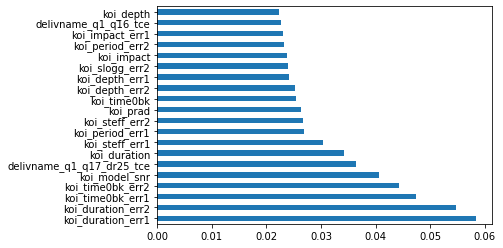

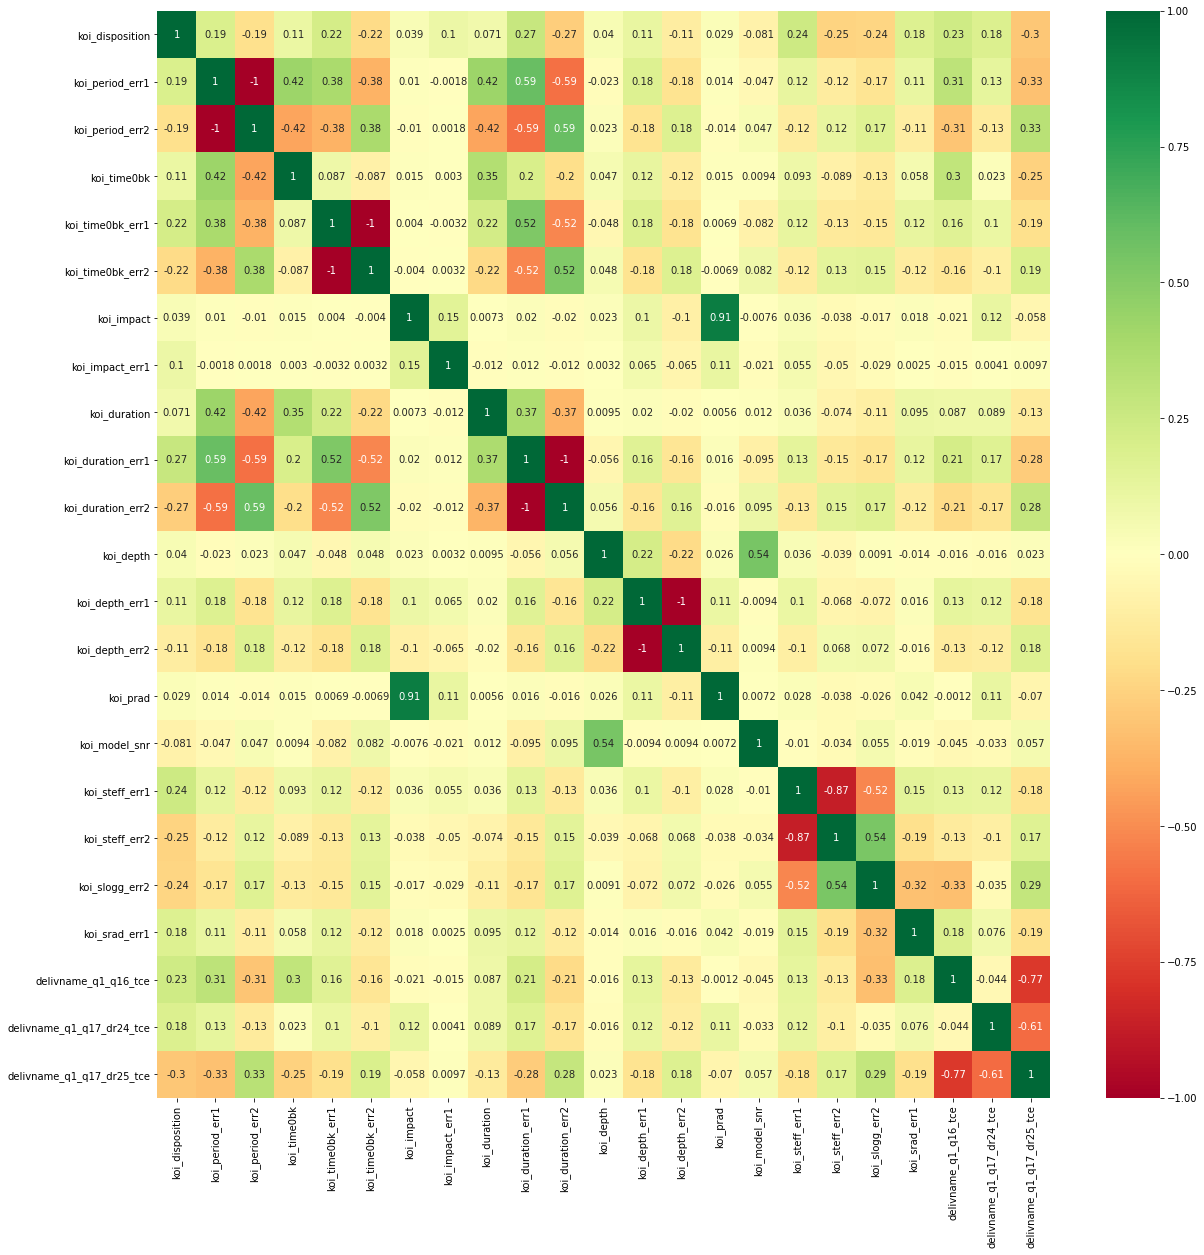

In [6]:
# getting data
df = data

# Drop unused columns
df = df.drop(['rowid', 'kepid', 'kepoi_name', 'kepler_name', 'koi_pdisposition', 'koi_score'], axis=1)
  
# Limit target values to CANDIDATE and CONFIRMED
false_positive_rows = df.query("koi_disposition == 'FALSE POSITIVE'").index
df = df.drop(false_positive_rows, axis=0).reset_index(drop=True)

#Transforming target column in binary data
df['koi_disposition'] = df['koi_disposition'].map({"CANDIDATE":1,"CONFIRMED":0})
    
# Drop columns with all missing values
df = df.drop(['koi_teq_err1', 'koi_teq_err2'], axis=1)

# Fill remaining missing values
df['koi_tce_delivname'] = df['koi_tce_delivname'].fillna(df['koi_tce_delivname'].mode()[0])
for column in df.columns[df.isna().sum() > 0]:
    df[column] = df[column].fillna(df[column].mean())
    
# One-hot encode koi_tce_delivname column
delivname_dummies = pd.get_dummies(df['koi_tce_delivname'], prefix='delivname')
df = pd.concat([df, delivname_dummies], axis=1)
df = df.drop('koi_tce_delivname', axis=1)

# Split df into X and y
y = df['koi_disposition']
X = df.drop('koi_disposition', axis=1)


#show the most important columns
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()


#drop the least important columns (20 good columns left)
df = df.drop(['koi_fpflag_nt', 'koi_fpflag_ss', 'koi_fpflag_co', 'koi_fpflag_ec', 'koi_period',
            'koi_impact_err2', 'koi_prad_err1', 'koi_prad_err2', 'koi_teq', 'koi_insol',
            'koi_insol_err1', 'koi_insol_err2', 'koi_tce_plnt_num', 'koi_steff', 'koi_slogg', 'koi_slogg_err1',
            'koi_srad', 'koi_srad_err2', 'ra', 'dec', 'koi_kepmag'], axis=1)


#get correlations of each features in dataset
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4541 entries, 0 to 4540
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   koi_disposition            4541 non-null   int64  
 1   koi_period_err1            4541 non-null   float64
 2   koi_period_err2            4541 non-null   float64
 3   koi_time0bk                4541 non-null   float64
 4   koi_time0bk_err1           4541 non-null   float64
 5   koi_time0bk_err2           4541 non-null   float64
 6   koi_impact                 4541 non-null   float64
 7   koi_impact_err1            4541 non-null   float64
 8   koi_duration               4541 non-null   float64
 9   koi_duration_err1          4541 non-null   float64
 10  koi_duration_err2          4541 non-null   float64
 11  koi_depth                  4541 non-null   float64
 12  koi_depth_err1             4541 non-null   float64
 13  koi_depth_err2             4541 non-null   float

# Preprocessing

In [8]:
def preprocess_inputs(df):
    df = df.copy()
    
    # Drop unused columns
    df = df.drop(['rowid', 'kepid', 'kepoi_name', 'kepler_name', 'koi_pdisposition', 'koi_score'], axis=1)
    
    '''
    #drop the least important columns (20 good columns left)
    df = df.drop(['koi_fpflag_nt', 'koi_fpflag_ss', 'koi_fpflag_co', 'koi_fpflag_ec', 'koi_period',
                 'koi_impact_err2', 'koi_prad_err1', 'koi_prad_err2', 'koi_teq', 'koi_insol',
                 'koi_insol_err1', 'koi_insol_err2', 'koi_tce_plnt_num', 'koi_steff', 'koi_slogg', 'koi_slogg_err1',
                 'koi_srad', 'koi_srad_err2', 'ra', 'dec', 'koi_kepmag'], axis=1)
    '''
    '''
    #drop the least important columns (10 good columns left)
    df = df.drop(['koi_fpflag_nt', 'koi_fpflag_ss', 'koi_fpflag_co', 'koi_fpflag_ec', 'koi_period',
                 'koi_impact_err2', 'koi_prad_err1', 'koi_prad_err2', 'koi_teq', 'koi_insol',
                 'koi_insol_err1', 'koi_insol_err2', 'koi_tce_plnt_num', 'koi_steff', 'koi_slogg', 'koi_slogg_err1',
                 'koi_period', 'koi_srad', 'koi_srad_err2', 'ra', 'dec', 'koi_kepmag', 'koi_srad_err1',
                 'koi_depth', 'koi_impact_err1', 'koi_impact', 'koi_depth_err1', 'koi_time0bk', 'koi_depth_err2',
                 'koi_period_err2', 'koi_steff_err2', 'koi_steff_err1'], axis=1)
    '''
    
    # Limit target values to CANDIDATE and CONFIRMED
    false_positive_rows = df.query("koi_disposition == 'FALSE POSITIVE'").index
    df = df.drop(false_positive_rows, axis=0).reset_index(drop=True)
    
    # Drop columns with all missing values
    df = df.drop(['koi_teq_err1', 'koi_teq_err2'], axis=1)
    
    # Fill remaining missing values
    df['koi_tce_delivname'] = df['koi_tce_delivname'].fillna(df['koi_tce_delivname'].mode()[0])
    for column in df.columns[df.isna().sum() > 0]:
        df[column] = df[column].fillna(df[column].mean())
    
    # One-hot encode koi_tce_delivname column
    delivname_dummies = pd.get_dummies(df['koi_tce_delivname'], prefix='delivname')
    df = pd.concat([df, delivname_dummies], axis=1)
    df = df.drop('koi_tce_delivname', axis=1)
    
    # Split df into X and y
    y = df['koi_disposition']
    X = df.drop('koi_disposition', axis=1)

    
    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, shuffle=True, random_state=1)
    
    # Scale X
    scaler = StandardScaler()
    scaler.fit(X_train)
    X_train = pd.DataFrame(scaler.transform(X_train), index=X_train.index, columns=X_train.columns)
    X_test = pd.DataFrame(scaler.transform(X_test), index=X_test.index, columns=X_test.columns)
    
    return X_train, X_test, y_train, y_test

In [9]:
X_train, X_test, y_train, y_test = preprocess_inputs(data)

In [10]:
X_train

,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,koi_time0bk_err2,koi_impact,koi_impact_err1,koi_impact_err2,koi_duration,koi_duration_err1,koi_duration_err2,koi_depth,koi_depth_err1,koi_depth_err2,koi_prad,koi_prad_err1,koi_prad_err2,koi_teq,koi_insol,koi_insol_err1,koi_insol_err2,koi_model_snr,koi_tce_plnt_num,koi_steff,koi_steff_err1,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag,delivname_q1_q16_tce,delivname_q1_q17_dr24_tce,delivname_q1_q17_dr25_tce
1673,-0.071134,-0.117116,-0.0355,-0.017742,-0.037165,-0.239706,0.239706,-0.497521,-0.000669,0.000669,0.272742,-0.140167,-0.266272,-0.441041,-0.079904,0.079904,-0.155163,-0.279154,0.279154,-0.035572,-0.031034,0.027635,0.646748,-0.023607,-0.034229,0.020831,-0.215034,0.780456,0.833483,-0.138215,0.084673,-0.331827,0.332863,0.162643,-0.012212,-0.045685,0.033953,-1.053449,-1.878703,-0.325469,-0.242131,-0.185756,0.312051
1239,-0.071134,-0.117116,-0.0355,-0.017742,-0.004275,-0.054711,0.054711,0.202478,0.092227,-0.092227,-0.293536,-0.077331,0.298219,0.352551,-0.069836,0.069836,-0.083836,0.091315,-0.091315,-0.031127,-0.030643,0.026235,-0.844428,-0.027647,-0.041769,0.022613,-0.175524,-0.490423,-0.330867,-1.083094,1.023246,0.060167,0.171510,0.548779,-0.083330,-0.292382,0.077194,0.659043,0.429700,0.597714,-0.242131,-0.185756,0.312051
3589,-0.071134,-0.117116,-0.0355,-0.017742,0.174458,1.954787,-1.954787,-0.239901,0.177133,-0.177133,-0.156273,-0.110109,0.096010,0.318639,0.640932,-0.640932,-0.107305,0.157386,-0.157386,-0.013500,0.009134,0.012008,-0.907385,-0.027660,-0.041620,0.022611,-0.208317,-0.490423,-0.783183,-0.270058,0.408907,-2.906019,0.959291,-2.636846,0.476722,3.648441,-0.313997,-1.261863,-1.319194,-1.420679,4.129990,-0.185756,-3.204607
415,-0.071134,-0.117116,-0.0355,-0.017742,-0.037962,-0.253911,0.253911,0.110849,-0.411112,0.411112,-0.273988,-0.097572,0.269409,-0.502304,-0.487437,0.487437,0.128285,-0.162350,0.162350,-0.023041,-0.020479,0.024953,0.483060,-0.024695,-0.032533,0.021526,0.399749,-0.490423,0.273194,0.938508,-0.836835,0.455247,-0.511866,-0.947499,-0.096417,0.021787,0.102868,-1.024723,0.715114,1.253905,-0.242131,-0.185756,0.312051
2925,-0.071134,-0.117116,-0.0355,-0.017742,0.010035,0.559955,-0.559955,0.873931,0.966253,-0.966253,0.021674,-0.142886,-0.099716,2.651326,1.110078,-1.110078,-0.137152,-0.122235,0.122235,-0.032889,-0.030154,0.026002,-0.779673,-0.027628,-0.041722,0.022601,-0.205947,-0.490423,0.365117,-1.105068,1.040311,-0.470722,0.570146,0.210910,0.000876,-0.066771,0.012333,-0.261806,-1.248770,0.522987,-0.242131,-0.185756,0.312051
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2895,-0.071134,-0.117116,-0.0355,-0.017742,-0.035650,-0.206766,0.206766,-0.396396,0.736509,-0.736509,-0.263603,-0.088207,0.254104,-0.019645,0.832215,-0.832215,-0.142028,0.029964,-0.029964,-0.035572,-0.029177,0.028335,0.123307,-0.026313,-0.037054,0.022072,-0.228863,-0.490423,0.960423,1.026404,-1.365849,0.297832,-0.454918,-1.092300,-0.080613,0.139864,0.090031,1.143456,1.093772,0.255217,-0.242131,-0.185756,0.312051
2763,-0.071134,-0.117116,-0.0355,-0.017742,-0.031798,-0.076652,0.076652,-0.276621,-0.121035,0.121035,-0.011924,-0.145605,-0.115921,-0.804897,-0.226889,0.226889,0.005323,1.535436,-1.535436,-0.025877,-0.021847,0.024136,-0.216659,-0.027136,-0.039964,0.022373,-0.210688,-0.490423,0.937078,1.509831,-1.741278,0.245360,-0.303056,-1.019900,-0.081848,0.095585,0.075842,0.628206,-1.259209,0.958113,-0.242131,-0.185756,0.312051
905,-0.071134,-0.117116,-0.0355,-0.017742,-0.026434,-0.229689,0.229689,-0.280512,-0.276861,0.276861,-0.294758,-0.086545,0.300019,0.372565,-0.321524,0.321524,-0.054763,-0.034928,0.034928,-0.026912,-0.028004,0.022853,-0.410926,-0.027394,-0.041346,0.022490,-0.107566,0.780456,0.264440,-0.292032,0.596622,-0.27626

In [11]:
y_train.value_counts()

CANDIDATE    1589
CONFIRMED    1589
Name: koi_disposition, dtype: int64

# Training

In [12]:
#variables for voting
clf1 = RandomForestClassifier()
clf2 = CatBoostClassifier(verbose=0)
clf3 = GradientBoostingClassifier()

#variables for stacking
estimators = [('rf', RandomForestClassifier(n_estimators=10, random_state=42)),('gb', GradientBoostingClassifier())]

models = {
    "Logistic Regression": LogisticRegression(),
    "      Decision Tree": DecisionTreeClassifier(),
    "     Neural Network": MLPClassifier(),
    "      Random Forest": RandomForestClassifier(),
    "          Ada Boost": AdaBoostClassifier(),
    "  Gradient Boosting": GradientBoostingClassifier(),
    "            XGBoost": XGBClassifier(eval_metric='logloss'),
    "           LightGBM": LGBMClassifier(),
    "           CatBoost": CatBoostClassifier(verbose=0),
    "   VotingClassifier": VotingClassifier(estimators=[('lr', clf1), ('rf', clf2), ('gnb', clf3)], voting='soft'),
    "          Stacking" : StackingClassifier(estimators=estimators, final_estimator=LogisticRegression())

}

for name, model in models.items():
    model.fit(X_train, y_train)
    print(name + " trained.")

Logistic Regression trained.
      Decision Tree trained.
     Neural Network trained.
      Random Forest trained.
          Ada Boost trained.
  Gradient Boosting trained.
            XGBoost trained.
           LightGBM trained.
           CatBoost trained.
   VotingClassifier trained.
          Stacking trained.


In [13]:
clf4 = AdaBoostClassifier()
clf4.fit(X_train, y_train)

AdaBoostClassifier()

# Results

In [14]:
def get_classifications(y_test, y_pred, positive_label='CONFIRMED'):
    tp = 0
    fn = 0
    fp = 0
    tn = 0
    
    for y_t, y_p in zip(y_test, y_pred):
        if y_t == positive_label:
            if y_p == positive_label:
                tp += 1
            else:
                fn += 1
        else:
            if y_p == positive_label:
                fp += 1
            else:
                tn += 1
    
    return tp, fn, fp, tn

def get_accuracy(tp, fn, fp, tn):
    acc = (tp + tn) / (tp + fn + fp + tn)
    return acc

def get_precision(tp, fn, fp, tn):
    precision = tp / (tp + fp)
    return precision

def get_recall(tp, fn, fp, tn):
    recall = tp / (tp + fn)
    return recall

def get_f1_score(tp, fn, fp, tn):
    precision = get_precision(tp, fn, fp, tn)
    recall = get_recall(tp, fn, fp, tn)
    f1_score = 2 * (precision * recall) / (precision + recall)
    return f1_score

def get_sensitivity(tp, fn, fp, tn):
    sensitivity = tp / (tp + fn)
    return sensitivity

def get_specificity(tp, fn, fp, tn):
    specificity = tn / (tn + fp)
    return specificity


In [15]:
for name, model in models.items():
    y_pred = model.predict(X_test)
    print(name + " Accuracy: {:.3f}%".format(get_accuracy(*get_classifications(y_test, y_pred)) * 100))

Logistic Regression Accuracy: 79.751%
      Decision Tree Accuracy: 75.495%
     Neural Network Accuracy: 79.751%
      Random Forest Accuracy: 81.218%
          Ada Boost Accuracy: 80.778%
  Gradient Boosting Accuracy: 82.612%
            XGBoost Accuracy: 81.291%
           LightGBM Accuracy: 81.731%
           CatBoost Accuracy: 82.318%
   VotingClassifier Accuracy: 83.052%
          Stacking Accuracy: 83.346%


In [16]:
for name, model in models.items():
    y_pred = model.predict(X_test)
    print(name + " Sensitivity: {:.3f}%".format(get_sensitivity(*get_classifications(y_test, y_pred)) * 100))

Logistic Regression Sensitivity: 87.358%
      Decision Tree Sensitivity: 76.562%
     Neural Network Sensitivity: 79.972%
      Random Forest Sensitivity: 83.665%
          Ada Boost Sensitivity: 85.085%
  Gradient Boosting Sensitivity: 86.364%
            XGBoost Sensitivity: 84.801%
           LightGBM Sensitivity: 85.795%
           CatBoost Sensitivity: 86.080%
   VotingClassifier Sensitivity: 86.790%
          Stacking Sensitivity: 86.364%


In [17]:
for name, model in models.items():
    y_pred = model.predict(X_test)
    print(name + " Specificity: {:.3f}%".format(get_specificity(*get_classifications(y_test, y_pred)) * 100))

Logistic Regression Specificity: 71.624%
      Decision Tree Specificity: 74.355%
     Neural Network Specificity: 79.514%
      Random Forest Specificity: 78.604%
          Ada Boost Specificity: 76.176%
  Gradient Boosting Specificity: 78.604%
            XGBoost Specificity: 77.542%
           LightGBM Specificity: 77.390%
           CatBoost Specificity: 78.300%
   VotingClassifier Specificity: 79.059%
          Stacking Specificity: 80.121%


In [18]:
for name, model in models.items():
    y_pred = model.predict(X_test)
    print(name + " Precision: {:.3f}%".format(get_precision(*get_classifications(y_test, y_pred)) * 100))

Logistic Regression Precision: 76.683%
      Decision Tree Precision: 76.130%
     Neural Network Precision: 80.659%
      Random Forest Precision: 80.685%
          Ada Boost Precision: 79.233%
  Gradient Boosting Precision: 81.175%
            XGBoost Precision: 80.134%
           LightGBM Precision: 80.212%
           CatBoost Precision: 80.908%
   VotingClassifier Precision: 81.575%
          Stacking Precision: 82.273%


In [19]:
for name, model in models.items():
    y_pred = model.predict(X_test)
    print(name + " F1 Score: {:.5f}".format(get_f1_score(*get_classifications(y_test, y_pred))))

Logistic Regression F1 Score: 0.81673
      Decision Tree F1 Score: 0.76346
     Neural Network F1 Score: 0.80314
      Random Forest F1 Score: 0.82148
          Ada Boost F1 Score: 0.82055
  Gradient Boosting F1 Score: 0.83689
            XGBoost F1 Score: 0.82402
           LightGBM F1 Score: 0.82910
           CatBoost F1 Score: 0.83414
   VotingClassifier F1 Score: 0.84102
          Stacking F1 Score: 0.84269


In [20]:
from sklearn.metrics import confusion_matrix

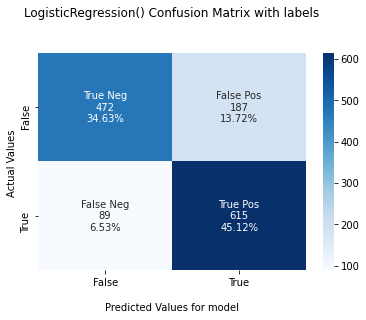

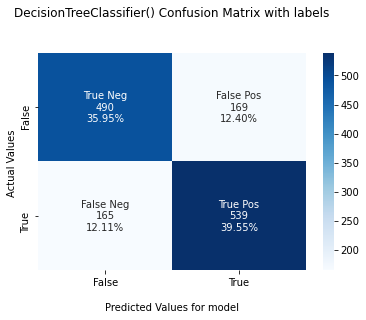

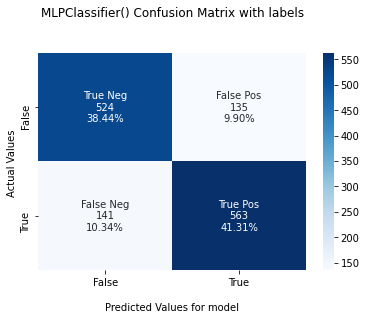

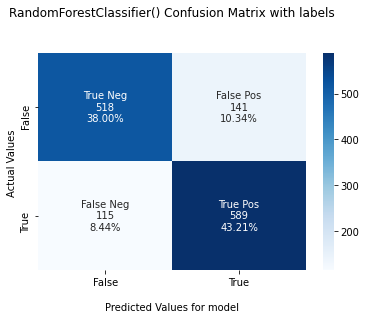

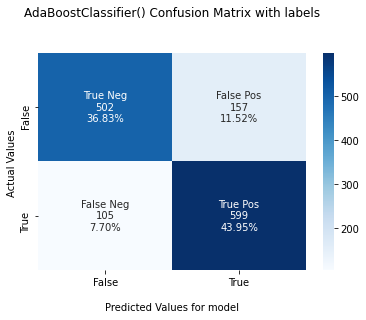

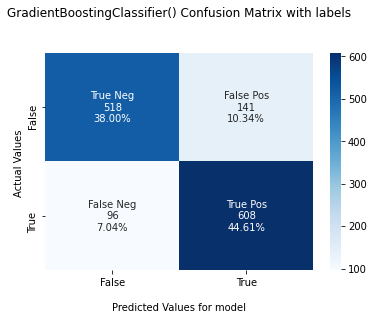

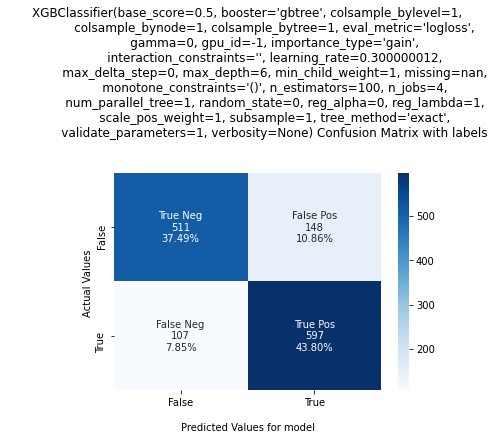

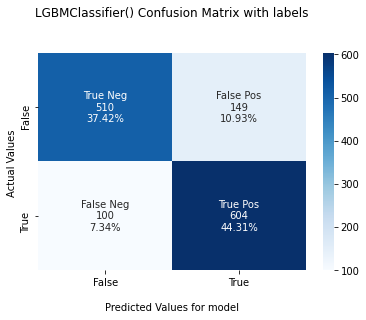

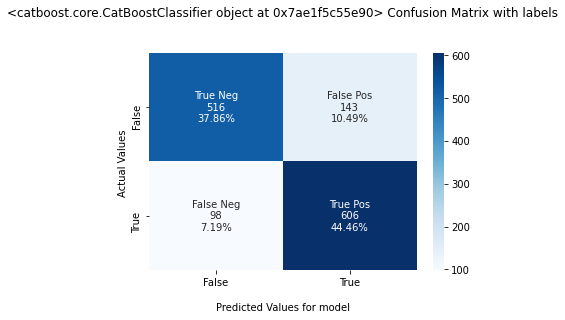

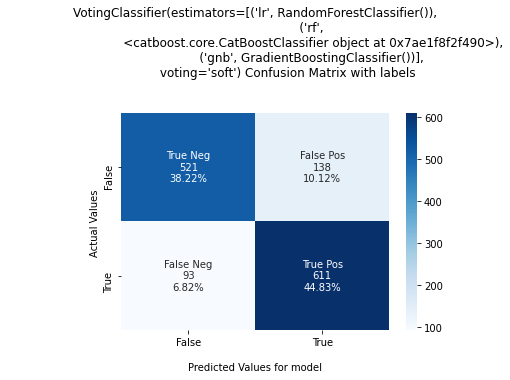

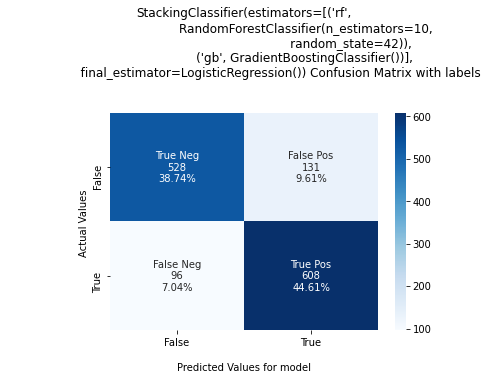

In [21]:
for name, model in models.items():
    y_pred = model.predict(X_test)
    cf_matrix = confusion_matrix(y_test, y_pred)
    group_names = ['True Neg','False Pos','False Neg','True Pos']

    group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]

    group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]

    labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

    labels = np.asarray(labels).reshape(2,2)

    ax = sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

    ax.set_title(str(model) + ' Confusion Matrix with labels\n\n');
    ax.set_xlabel('\nPredicted Values for model')
    ax.set_ylabel('Actual Values ');

    ## Ticket labels - List must be in alphabetical order
    ax.xaxis.set_ticklabels(['False','True'])
    ax.yaxis.set_ticklabels(['False','True'])

    ## Display the visualization of the Confusion Matrix.
    plt.show()

# Data Every Day  

This notebook is featured on Data Every Day, a YouTube series where I train models on a new dataset each day.  

***

Check it out!  
https://youtu.be/nklFC-_xi2U